# Predictions based on final vector - vFINAL

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* TMV (Total Market Value)
* Forma (zwycięstwa/przegrane) z ostatnich 3 meczów
* Ważona średnia liczba oddanych strzałów z ostatnich 5 meczów
* Ważona średnia liczba strzałów na bramkę z ostatnich 5 meczów
* Ważona średnia liczba goli w ostatnich 5 meczach

In [2]:
model_data = pd.read_csv('learning_vectors/v05/version5-complete.csv', sep=',')

# model_data = model_data.set_index(['Match_id'])
# model_data = model_data.sort_values(['League_id', 'Date'])
# model_data.columns = [
#     'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
#     'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
#     'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
#     'H_age', 'A_age',
#     'H_TMV', 'A_TMV',
#     'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
#     'H_Form03', 'A_Form03',
#     'H_Form05', 'A_Form05',
#     'H_MeanShots03', 'A_MeanShots03',
#     'H_MeanShots05', 'A_MeanShots05',
#     'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
#     'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
#     'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03',
#     'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
#     'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
#     'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
#     'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
#     'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
#     'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
#     'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
# ]

print(model_data.shape)
# model_data.head()


(6080, 62)


## Different algorithms comparison

In [3]:
features = [
    'H_TMV', 'A_TMV',
    'H_Form05', 'A_Form05',
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_vFINAL.txt','w')

print(model_data[features].shape)
model_data[features].head()


(6080, 10)


,H_TMV,A_TMV,H_Form05,A_Form05,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
0,250.0,64.0,7,1,19.617647,11.823529,11.558824,5.058824,2.000000,0.735294
1,91.0,257.0,3,12,8.000000,17.882353,4.235294,9.529412,0.558824,1.764706
2,80.0,61.0,5,5,13.558824,17.264706,8.058824,9.176471,1.029412,1.117647
3,162.0,86.0,10,4,13.088235,13.911765,6.941176,7.764706,1.882353,2.058824
4,73.0,212.0,11,7,13.058824,10.735294,7.558824,6.382353,1.941176,2.411765


In [4]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()


### Basic compraison: 

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR  	0.535362 	(0.013087)
LDA  	0.532401 	(0.016659)
KNN  	0.477138 	(0.003733)
CART  	0.420066 	(0.007537)
NB  	0.510362 	(0.005551)
SVM  	0.466776 	(0.009122)


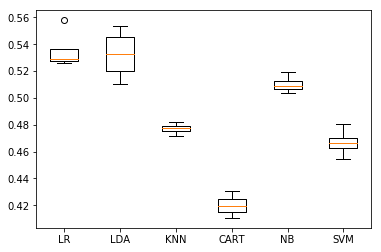

In [5]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)


### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR  	0.536842 	(0.012833)
LDA  	0.534704 	(0.008022)
KNN  	0.476151 	(0.005061)
CART  	0.424507 	(0.023493)
NB  	0.512664 	(0.006196)
SVM  	0.533553 	(0.011888)


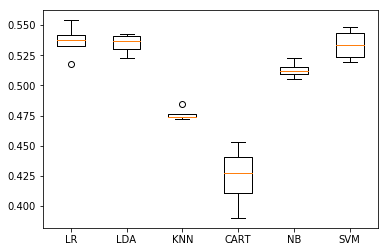

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

### Other comparisons:

In [7]:
f = [
    'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
    'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03',
    'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
    'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
    'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03',
    'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
    'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

X = preprocessing.scale(model_data[f])
y = model_data['Result']

compare_algs(X, y, cross_validator, scoring_type)

-- Other comparison --


AttributeError: 'list' object has no attribute 'write'